In this notebook I will apply feature selection techniques to reduce the number of features and streamline the model.

I will apply the methods in conjunction with the application the the machine learning algorithm. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
X_train_OCE = pd.read_csv('X_train_OCE_4.csv', index_col=[0])
X_test_OCE = pd.read_csv('X_test_OCE_4.csv', index_col=[0])

X_train_MCE = pd.read_csv('X_train_MCE_4.csv', index_col=[0])
X_test_MCE = pd.read_csv('X_test_MCE_4.csv', index_col=[0])

X_train_OCE.shape, X_train_MCE.shape

((978, 78), (978, 78))

In [3]:
X_train_OCE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 78 columns):
MSSubClass       978 non-null int64
MSZoning         978 non-null int64
LotFrontage      978 non-null float64
LotArea          978 non-null float64
Street           978 non-null int64
LotShape         978 non-null int64
LandContour      978 non-null int64
Utilities        978 non-null int64
LotConfig        978 non-null int64
LandSlope        978 non-null int64
Neighborhood     978 non-null int64
Condition1       978 non-null int64
Condition2       978 non-null int64
BldgType         978 non-null int64
HouseStyle       978 non-null int64
OverallQual      978 non-null float64
OverallCond      978 non-null float64
YearBuilt        978 non-null float64
YearRemodAdd     978 non-null int64
RoofStyle        978 non-null int64
RoofMatl         978 non-null int64
Exterior1st      978 non-null int64
Exterior2nd      978 non-null int64
MasVnrType       978 non-null int64
MasVnrArea       9

Implement basic filter methods:
 - removal of constant features
 - removal of quasi-constant features
 - removal of correlated features

In [4]:
#constant features
[x for x in X_train_OCE.columns if X_train_OCE[x].std() == 0]
#there are none

[]

In [5]:
#quasi-constant features
[x for x in X_train_OCE.columns if X_train_OCE[x].std() <= 0.02]

[]

In [6]:
list = X_train_OCE.columns

In [7]:
X_train_OCE[list].std().sort_values()
#only utilities and street seem to be relatively constant. Quick graphical review below:

Utilities          0.031976
Street             0.055328
OverallCond        0.077001
OverallQual        0.092116
Condition2         0.095536
                   ...     
MasVnrArea       174.931681
MiscVal          345.359115
BsmtFinSF1       436.050024
2ndFlrSF         438.998906
SalePrice      76175.965601
Length: 78, dtype: float64

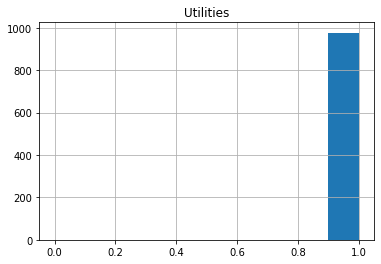

1    977
0      1
Name: Utilities, dtype: int64


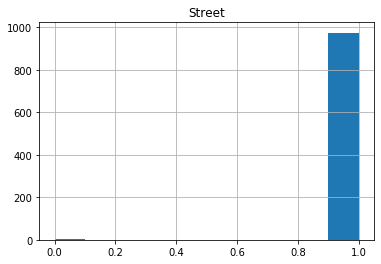

1    975
0      3
Name: Street, dtype: int64


In [8]:
def quickplot(df,var):
    df[var].hist()
    plt.title(var)
    
    plt.show()
    print(df[var].value_counts())
    
for col in 'Utilities', 'Street':
    quickplot(X_train_OCE,col)
    
#the two variables seem to be pretty constant. In OCE training and test dataset, I will remove the two variables.

In [9]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

#X_train_basic_filter = X_train.copy()
#X_test_basic_filter = X_test.copy()

In [9]:
X_train_OCE = X_train_OCE.drop(['Utilities', 'Street'], axis=1)
X_test_OCE = X_test_OCE.drop(['Utilities', 'Street'], axis=1)

In [10]:
X_train_MCE[list].std().sort_values()
#seems like there are no features that are constant enough to be removed, thus MCE and OCE sets already are different
# by two features

OverallCond         0.077003
OverallQual         0.092118
TotRmsAbvGrd        0.098313
MoSold              0.187007
KitchenAbvGr        0.214446
                    ...     
GarageFinish    42348.972707
ExterQual       51158.556507
KitchenQual     51234.563931
BsmtQual        51403.838560
SalePrice       76175.965601
Length: 78, dtype: float64

In the next cells I deal with correlated features.

In some previous notebooks, we saw that there are quite some variables that are either positively or negatively correlated:

In [11]:
X_train_OCE.corr()
#X_train_MCE.corr()
#in the next cells I will deal with highly correlated features and remove them from the sets.

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.236691,-0.455082,-0.465498,-0.092908,-0.030935,0.023520,-0.024780,0.010358,-0.020662,...,-0.053036,0.018762,0.111671,0.012166,0.029691,0.021224,-0.028582,-0.046193,-0.055909,-0.100806
MSZoning,-0.236691,1.000000,0.301451,0.329267,0.188008,0.073718,0.064198,0.023406,0.344197,0.141292,...,0.021340,0.023445,0.044570,0.010338,-0.005418,-0.007613,0.027969,0.156747,0.153565,0.328689
LotFrontage,-0.455082,0.301451,1.000000,0.657333,0.152542,0.056681,-0.197687,0.085453,0.081823,0.040543,...,0.071458,0.137415,-0.045171,-0.017561,0.013508,0.006775,0.006320,0.107399,0.123036,0.320028
LotArea,-0.465498,0.329267,0.657333,1.000000,0.340296,0.158477,0.027507,0.218877,0.014935,0.074783,...,0.133274,0.124663,0.011801,-0.019215,0.065197,-0.002772,-0.020725,0.068812,0.066957,0.421989
LotShape,-0.092908,0.188008,0.152542,0.340296,1.000000,0.137065,0.114695,0.204907,0.141930,0.115020,...,0.106865,0.050886,0.079815,-0.017322,0.016431,0.042709,-0.007888,0.030624,0.025440,0.251407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021224,-0.007613,0.006775,-0.002772,0.042709,0.072370,0.013046,-0.000183,0.012613,0.061553,...,0.017059,-0.039779,-0.004360,-0.011534,0.029762,1.000000,-0.146852,0.036542,0.074709,0.047293
YrSold,-0.028582,0.027969,0.006320,-0.020725,-0.007888,-0.039330,0.008252,0.001885,-0.032312,0.038897,...,0.027474,-0.065427,-0.059603,-0.083157,0.031077,-0.146852,1.000000,-0.099704,-0.051327,-0.011040
SaleType,-0.046193,0.156747,0.107399,0.068812,0.030624,0.084437,0.059783,-0.023468,0.326009,0.085858,...,-0.055771,0.027381,0.115981,0.031330,-0.014463,0.036542,-0.099704,1.000000,0.660249,0.327484
SaleCondition,-0.055909,0.153565,0.123036,0.066957,0.025440,0.100719,0.012644,-0.038669,0.330872,0.094991,...,-0.061268,0.022092,0.151609,0.026110,-0.009233,0.074709,-0.051327,0.660249,1.000000,0.352941


In [12]:
corr_data = X_train_OCE.corr()
corr_data.iloc[3,2]

0.6573331354607517

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [14]:
corr_data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.236691,-0.455082,-0.465498,-0.092908,-0.030935,0.023520,-0.024780,0.010358,-0.020662,...,-0.053036,0.018762,0.111671,0.012166,0.029691,0.021224,-0.028582,-0.046193,-0.055909,-0.100806
MSZoning,-0.236691,1.000000,0.301451,0.329267,0.188008,0.073718,0.064198,0.023406,0.344197,0.141292,...,0.021340,0.023445,0.044570,0.010338,-0.005418,-0.007613,0.027969,0.156747,0.153565,0.328689
LotFrontage,-0.455082,0.301451,1.000000,0.657333,0.152542,0.056681,-0.197687,0.085453,0.081823,0.040543,...,0.071458,0.137415,-0.045171,-0.017561,0.013508,0.006775,0.006320,0.107399,0.123036,0.320028
LotArea,-0.465498,0.329267,0.657333,1.000000,0.340296,0.158477,0.027507,0.218877,0.014935,0.074783,...,0.133274,0.124663,0.011801,-0.019215,0.065197,-0.002772,-0.020725,0.068812,0.066957,0.421989
LotShape,-0.092908,0.188008,0.152542,0.340296,1.000000,0.137065,0.114695,0.204907,0.141930,0.115020,...,0.106865,0.050886,0.079815,-0.017322,0.016431,0.042709,-0.007888,0.030624,0.025440,0.251407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021224,-0.007613,0.006775,-0.002772,0.042709,0.072370,0.013046,-0.000183,0.012613,0.061553,...,0.017059,-0.039779,-0.004360,-0.011534,0.029762,1.000000,-0.146852,0.036542,0.074709,0.047293
YrSold,-0.028582,0.027969,0.006320,-0.020725,-0.007888,-0.039330,0.008252,0.001885,-0.032312,0.038897,...,0.027474,-0.065427,-0.059603,-0.083157,0.031077,-0.146852,1.000000,-0.099704,-0.051327,-0.011040
SaleType,-0.046193,0.156747,0.107399,0.068812,0.030624,0.084437,0.059783,-0.023468,0.326009,0.085858,...,-0.055771,0.027381,0.115981,0.031330,-0.014463,0.036542,-0.099704,1.000000,0.660249,0.327484
SaleCondition,-0.055909,0.153565,0.123036,0.066957,0.025440,0.100719,0.012644,-0.038669,0.330872,0.094991,...,-0.061268,0.022092,0.151609,0.026110,-0.009233,0.074709,-0.051327,0.660249,1.000000,0.352941


In [15]:
def correlation1(data):
    col_list = []
    for i in range(len(data.corr())):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > 0.8:
                col_name =  data.corr().columns[i]
                col_list.append(col_name)
    return col_list

In [16]:
correlation1(X_train_OCE)

['Exterior2nd',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'GarageCond']

In [17]:
X_train_OCE.corr()['GarageCond'].sort_values(ascending=False)

GarageCond       1.000000
GarageQual       0.847916
GarageArea       0.827371
GarageType       0.587293
GarageCars       0.546344
                   ...   
MSSubClass      -0.052674
EnclosedPorch   -0.087836
LowQualFinSF    -0.103984
KitchenAbvGr    -0.166953
GarageYrBlt     -0.177370
Name: GarageCond, Length: 76, dtype: float64

In [19]:
X_train_OCE.corr()['TotRmsAbvGrd'].sort_values(ascending=False)

TotRmsAbvGrd    1.000000
GrLivArea       0.828497
BedroomAbvGr    0.699181
2ndFlrSF        0.590835
FullBath        0.541416
                  ...   
LandSlope      -0.019723
BsmtHalfBath   -0.031954
BsmtFullBath   -0.058786
Condition2     -0.067180
YrSold         -0.071316
Name: TotRmsAbvGrd, Length: 76, dtype: float64

In [18]:
X_train_OCE.corr()['1stFlrSF'].sort_values(ascending=False)

1stFlrSF         1.000000
SalePrice        0.591700
GrLivArea        0.528485
LotArea          0.479236
TotalBsmtSF      0.449368
                   ...   
EnclosedPorch   -0.085795
OverallCond     -0.110802
HalfBath        -0.153809
2ndFlrSF        -0.242668
MSSubClass      -0.292563
Name: 1stFlrSF, Length: 76, dtype: float64

Having a quick check what variables are the variables from the list provided by the function correlated with, it is clear that the function prevented from duplicating efforts. This means, we can remove the 'list' from X_train_OCE as well as X_test_OCE. (Importantly, since I preserved the target variables in the training sets, I make sure these do not appear in among the list of variables with which the absolute correlation is over 0.8)

Before doing so, I will run the fuction on the X_train_MCE set.

In [19]:
correlation1(X_train_MCE)

['Exterior2nd',
 'TotRmsAbvGrd',
 'GarageQual',
 'GarageCond',
 'GarageCond',
 'SaleCondition']

In [20]:
#remove the correlated vars
X_train_OCE = X_train_OCE.drop(['Exterior2nd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond'],axis=1)

X_test_OCE = X_test_OCE.drop(['Exterior2nd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond'],axis=1)

X_train_MCE = X_train_MCE.drop(['Exterior2nd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'GarageCond',
 'SaleCondition'],axis=1)

X_test_MCE = X_test_MCE.drop(['Exterior2nd',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'GarageCond',
 'SaleCondition'],axis=1)

In [21]:
X_train_OCE.shape, X_train_MCE.shape
#slightly reduced feature spaces on both variables.

((978, 70), (978, 72))

In [22]:
#save the sets to csv
X_train_OCE.to_csv('X_train_OCE_5.csv')
X_test_OCE.to_csv('X_test_OCE_5.csv')

X_train_MCE.to_csv('X_train_MCE_5.csv')
X_test_MCE.to_csv('X_test_MCE_5.csv')

Before proceeding with more feature selection methods I will try and test a ML model on the sets we have now.

In [23]:
#first, separate the y's
y_train = X_train_OCE['SalePrice'].to_frame(name="SalesPrice")
y_test = X_test_OCE['SalePrice'].to_frame(name="SalesPrice")
#it does not matter whether we extract from OCE or MCE, as they are essentially copied of each other and the target was
#not pre-processed

#as for the training sets, we will not focus on OCE
X_train = X_train_OCE.drop('SalePrice',axis=1)
X_test = X_test_OCE.drop('SalePrice', axis=1)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((978, 69), (978, 1), (482, 69), (482, 1))

In [71]:
#secondly, I will create a pipeline for a linear and a logistic model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, r2_score, explained_variance_score

def process(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    prediction = lr.predict(X_test)
    print(lr.intercept_)
    print(lr.coef_)
    print(lr.score(X_train, y_train))
    print(lr.score(X_test, y_test))
    #plots
    fix, axes = plt.subplots(1,2)
    axes[0].scatter(y_test,prediction)  
    axes[1].hist((y_test-prediction))
    ###
    print(explained_variance_score(y_test, prediction))
    print(r2_score(y_test, prediction))
    

    

[-2053600.39358457]
[[-2.04137453e+02  3.45753177e+03 -9.09176902e+03  5.10858379e+03
   6.22253841e+02  9.79312157e+03  2.40900229e+03  7.30156321e+03
   1.97853021e+03 -4.18102655e+02  4.06916069e+04 -5.14772245e+03
   2.57924957e+02  1.11386720e+05  5.89312393e+04 -2.73296369e-01
  -6.59077793e+01  3.06051058e+03 -1.36595514e+04  8.59391903e+02
  -7.33569097e+02  2.96785390e+01  1.43788025e+04 -1.95324802e+03
   9.22945726e+01  9.16582656e+03 -5.60578962e+03  4.15647480e+03
   6.73499034e+02  2.55782979e+01  6.43336923e+02  1.79155013e+01
   1.89702802e+03 -4.36044097e+03  1.37983826e+03  1.84807496e+02
  -1.26796759e+03 -3.31597480e+03 -1.59869480e-01  4.09417490e+01
   5.94325506e+04  1.52309749e+03 -4.73857146e+03  1.33265461e+03
  -1.58861597e+03 -5.32190518e+03 -1.94543641e+04  9.56631584e+03
   5.33210497e+03  4.11956212e+03 -1.45213651e+03  6.54874030e+01
  -2.85210951e+02  1.11110760e+04 -2.04562516e+03  1.43149871e+02
   2.20826268e+01 -8.15484078e+00  1.70392479e+01  2.879

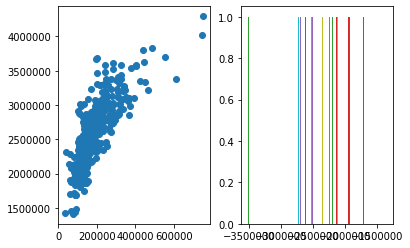

In [72]:
process(X_train, X_test, y_train, y_test)


The linear model above does not do a good job with the data we have at hand. The errors by far do not seem to be normally distributed, and the relationship between the predictions and y_test does not seem to be perfectly linear. 

In addition, the explained variance score is negative - which is terrible. As well as the r2 score  - which is beyond terrible. 


Will try the same prediction with the MCE version of the datasets, but seems like the only thing we can do is to simplify the feature space and try again.

In [74]:
X_train = pd.read_csv('X_train_MCE_5.csv')
X_test = pd.read_csv('X_test_OCE_5.csv')

y_train = X_train['SalePrice'].to_frame(name="SalesPrice")
y_test = X_test['SalePrice'].to_frame(name="SalesPrice")
#it does not matter whether we extract from OCE or MCE, as they are essentially copied of each other and the target was
#not pre-processed

#as for the training sets, we will not focus on OCE
X_train = X_train.drop('SalePrice',axis=1)
X_test = X_test.drop('SalePrice', axis=1)

In [75]:
process(X_train, X_test, y_train, y_test)


ValueError: shapes (482,70) and (72,1) not aligned: 70 (dim 1) != 72 (dim 0)